# Pymoo tutorial and introduction notebook

In [3]:
#library installations
%pip install matplotlib pymoo numpy deap plotly

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
     ----------------------------- ---------- 0.8/1.1 MB 1.5 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for deap: filename=deap-1.4.1-cp312-cp312-win_amd64.whl size=108331 sha256=ff05e2f961e04090b409891e6f16569c8c6faf15463cee81aecb77fc2f24e7cd
  Stored in directory: c:\users\derne\appdata\local\pip\cache\wheels\6c\1d\91\0a68add63bf57c3263b06b3462179d244fed0ff1dbb8d5eff0
Successfully bui

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

import plotly.graph_objects as go

import numpy as np

from deap import benchmarks # to use the DEAP benchmark functions; such as the ZDT functions

from pymoo.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2

## Setup example

Shape of X: (100, 100), 
 Shape of Y : (100, 100)


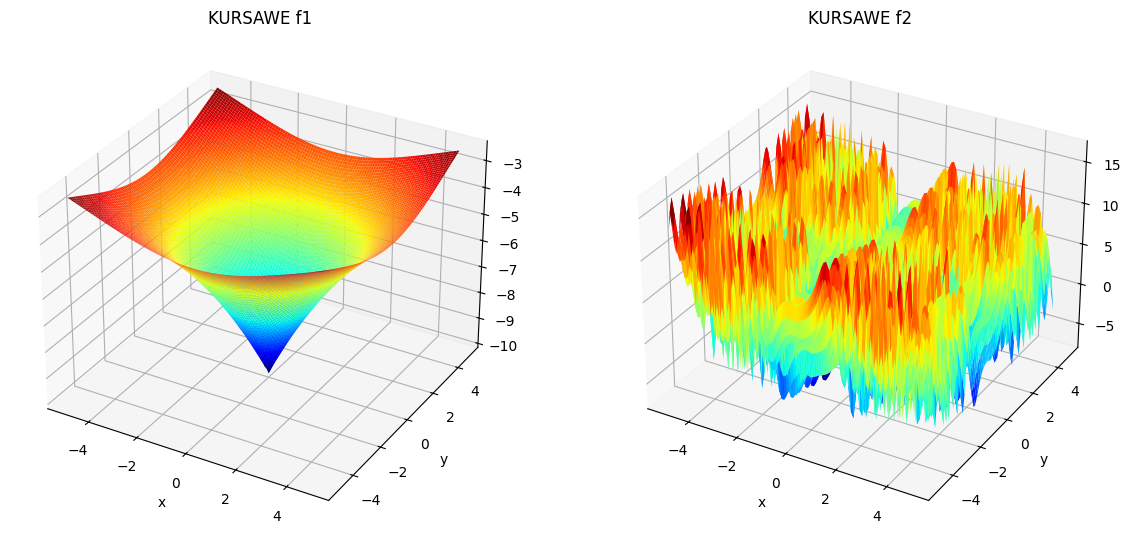

In [2]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z1 = np.zeros(X.shape) #initialize this array to hold the kursawe function
Z2 = np.zeros(Y.shape)
print(f'Shape of X: {X.shape}, \n Shape of Y : {Y.shape}')

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z1[i,j], Z2[i,j] = benchmarks.kursawe((X[i,j], Y[i,j]))



#plot figures
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("KURSAWE f1")

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("KURSAWE f2")

plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
plt.show()


In [3]:
from pymoo.optimize import minimize

- Problem
- Algorithm
- Stop criteria

In [4]:
#problem definition


class ProblemWrapper(Problem):
    
    def _evaluate(self, designs, out, *args, **kwargs):
        res =[]
        for design in designs:
            res.append(benchmarks.kursawe(design))
            
        out['F'] = np.array(res)
        


In [20]:
problem = ProblemWrapper(
    n_var=2,
    n_obj=2,
    xl=[-5.,-5.],
    xu=[5.,5.]
)

### Algorithm

In [ ]:
# Algorithm

algorithm = NSGA2(pop_size =100)

In [27]:
# Stop Criteria

stop_criteria = ('n_gen', 100)

In [29]:
#Visualize rusults

results = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=stop_criteria
)

ImportError: DLL load failed while importing non_dominated_sorting: The filename or extension is too long.

### visualize

In [ ]:
res_data = results.F.T

In [ ]:
fig = go.Figure(data=go.Scatter(x=res_data[0], y=res_data[1], mode='markers'))
fig.show()